In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [8]:
df1 = pd.read_csv("DF1", index_col = 0)
df1.head(10)

,0,1,2,3
0,1.038502,0.899865,0.835053,-0.971528
1,0.320455,-0.647459,0.149079,0.352593
2,0.055480,2.234771,0.271672,-2.108739
3,-0.007260,-0.524299,-0.126550,0.670827
4,-1.237390,-1.377017,-1.049932,1.342079
5,0.477841,0.032660,0.336723,-0.171675
6,-0.486923,-1.128336,-0.459850,1.113013
7,0.313020,0.677323,0.123082,-0.617958
8,0.919790,-0.539665,0.956577,0.821389
9,0.574238,-1.024339,0.471622,1.006623


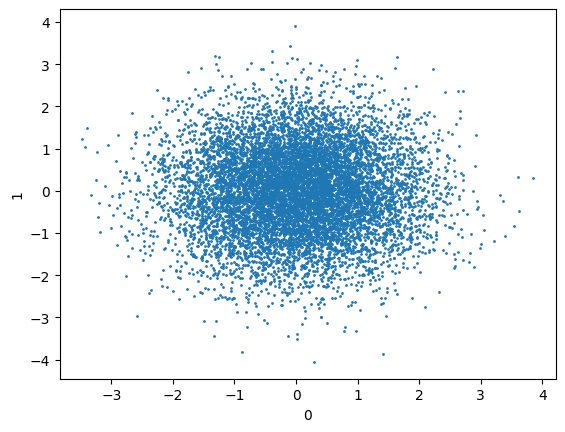

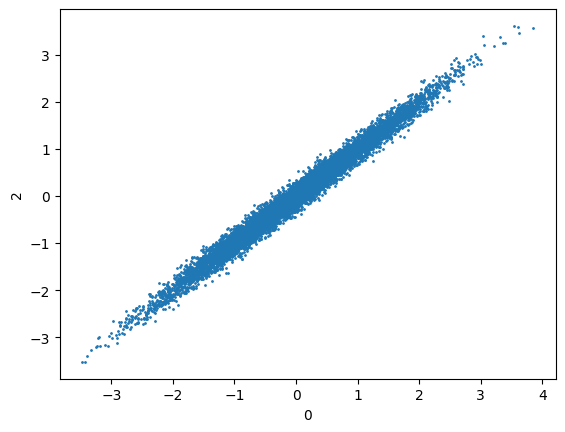

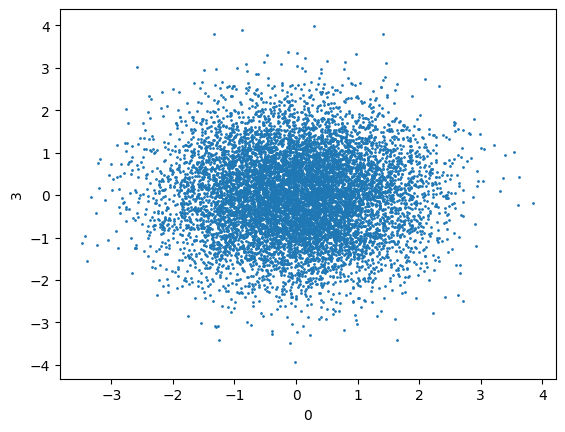

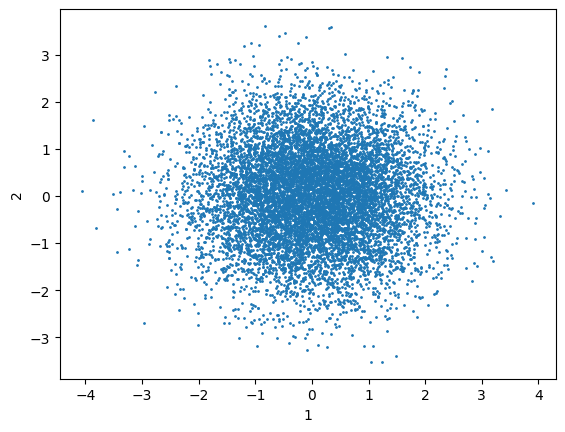

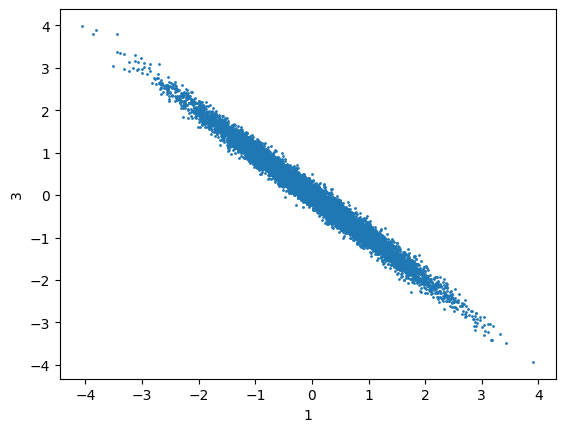

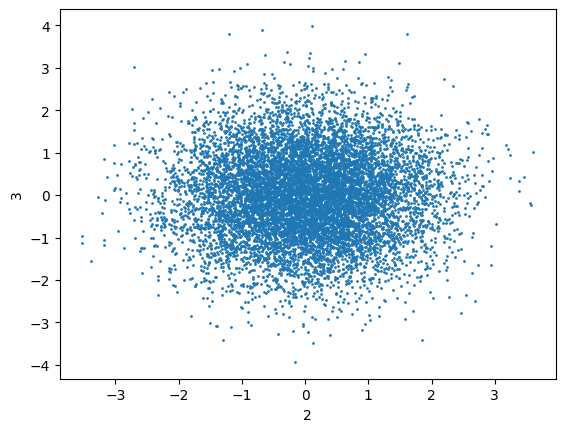

In [11]:
for i in range(0, 4):
    for j in range(i + 1, 4):
        df1.plot.scatter(x = str(i), y = str(j),s = 1)
        plt.show()

The scatter plots clearly show a correlation between 0 and 2, 1 and 3

array([[<AxesSubplot:xlabel='0', ylabel='0'>,
        <AxesSubplot:xlabel='1', ylabel='0'>,
        <AxesSubplot:xlabel='2', ylabel='0'>,
        <AxesSubplot:xlabel='3', ylabel='0'>],
       [<AxesSubplot:xlabel='0', ylabel='1'>,
        <AxesSubplot:xlabel='1', ylabel='1'>,
        <AxesSubplot:xlabel='2', ylabel='1'>,
        <AxesSubplot:xlabel='3', ylabel='1'>],
       [<AxesSubplot:xlabel='0', ylabel='2'>,
        <AxesSubplot:xlabel='1', ylabel='2'>,
        <AxesSubplot:xlabel='2', ylabel='2'>,
        <AxesSubplot:xlabel='3', ylabel='2'>],
       [<AxesSubplot:xlabel='0', ylabel='3'>,
        <AxesSubplot:xlabel='1', ylabel='3'>,
        <AxesSubplot:xlabel='2', ylabel='3'>,
        <AxesSubplot:xlabel='3', ylabel='3'>]], dtype=object)

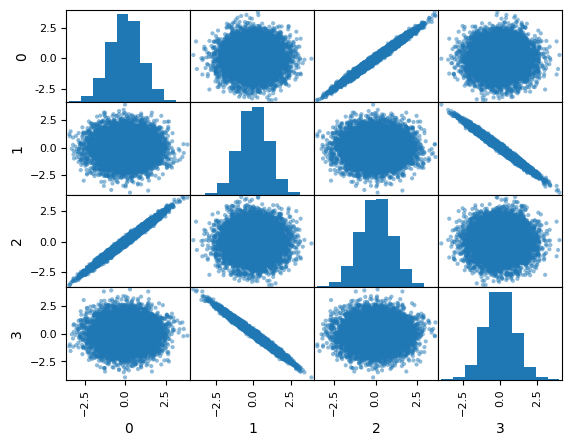

In [15]:
pd.plotting.scatter_matrix(df1) # an alternate way to display the data

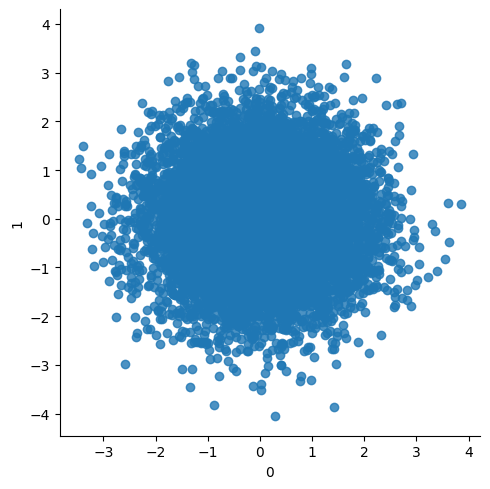

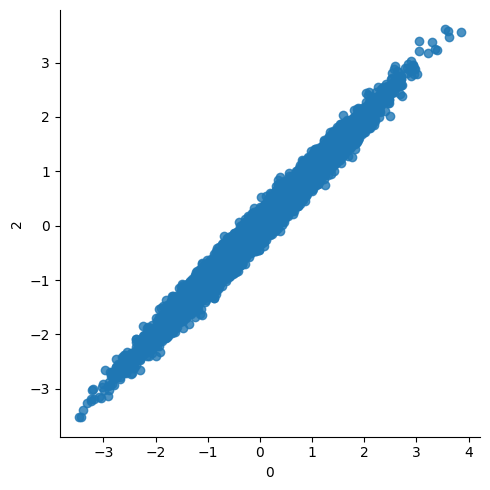

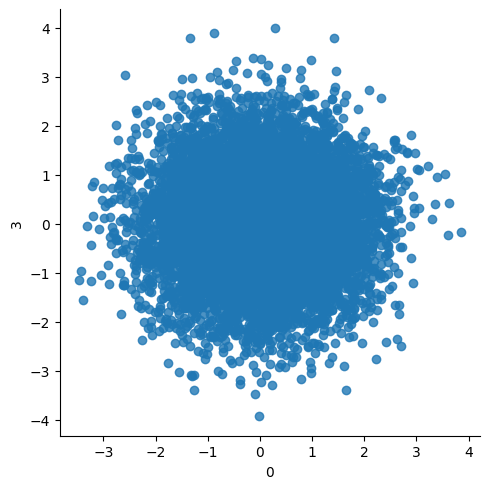

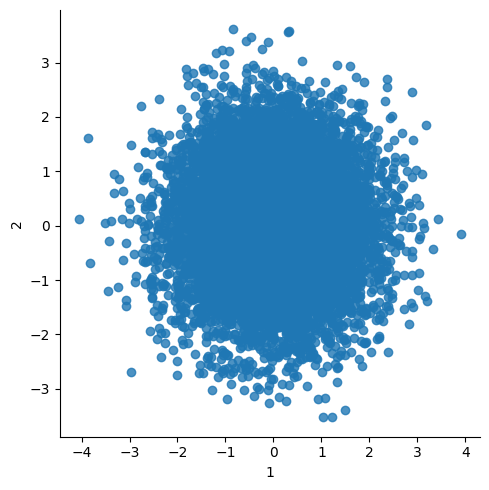

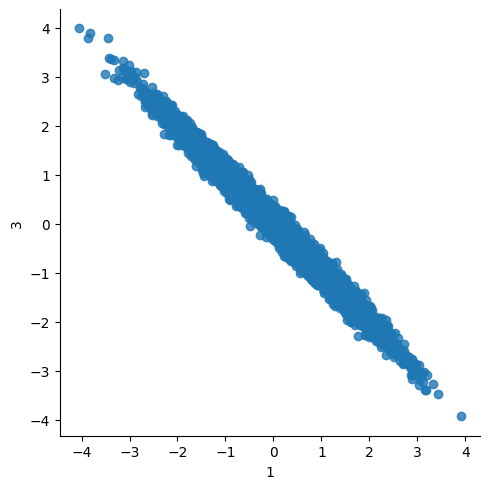

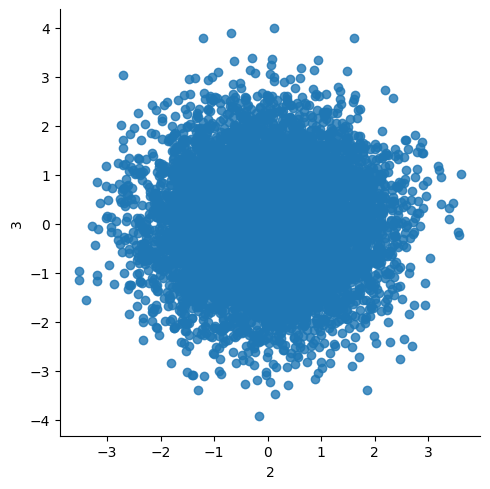

In [5]:
df1 = pd.read_csv("DF1", index_col = 0)
for i in range(0, 4):
    for j in range(i + 1, 4):
        sns.lmplot(x = str(i), y = str(j), data = df1, fit_reg = False)
        plt.show()

Seaborn also shows the same correlations

In [12]:
df1 = pd.read_csv("DF1", index_col = 0)
df1.cov()

,0,1,2,3
0,1.001558,-0.004012,0.991624,0.004125
1,-0.004012,1.005378,-0.004099,-0.995457
2,0.991624,-0.004099,1.001589,0.004081
3,0.004125,-0.995457,0.004081,1.005168


The covariance matrix represents the variances between different variables as follows:
```
var(0),   cov(0,1), cov(0,2), cov(0,3)
cov(1,0), var(1),   cov(1,2), cov(1,3)
cov(2,0), cov(2,1), var(2),   cov(2,3)
cov(3,0), cov(3,1), cov(3,2), var(3)
```

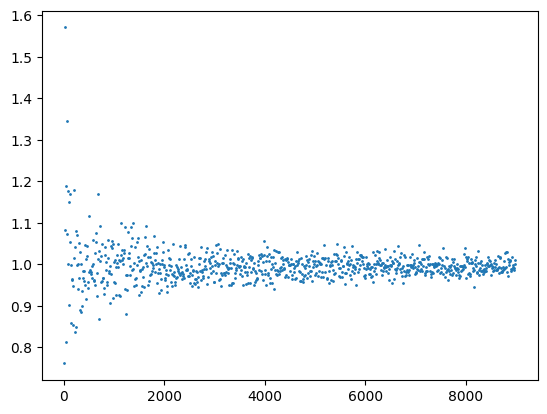

In [13]:
cov = [[1,.005,.005],
        [.005,1,.995],
        [.005,.995,1]]
means = [0,0,0]
samples = 10
# Record the values and show that est_cov converges to the actual values in the covariance matrix
sample_size = []
actual_cov = []
while(samples < 9e3):
    # Draw Samples from the actual matrix, into a column vector
    dist = pd.DataFrame(data = np.random.multivariate_normal(means, cov, samples))
    #estimate the covariance matrix
    cov_est = dist.cov()
    sample_size.append(samples)
    actual_cov.append(cov_est[1][2])
    samples += 10
plt.scatter(x = sample_size, y = actual_cov, s = 1)
plt.xlabel('Samples drawn')
plt.show()

The Scatter plot clearly demonstrates that as we draw more samples and determine values for covariance, we converge to the actual covariance.